In [1]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import pickle

%load_ext autoreload
%autoreload 2

Now considering: Fremont, California, USA


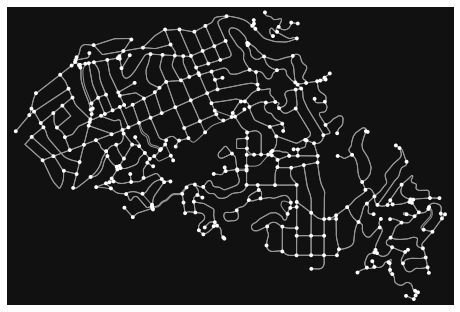

Now considering: Fremont, California, USA


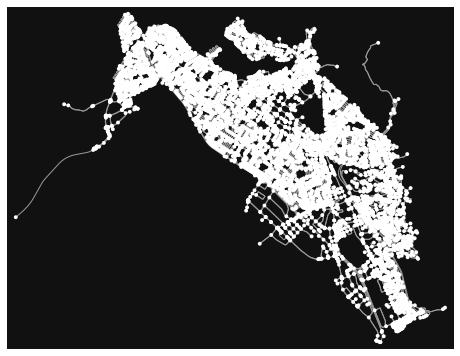

Now considering: Founex, Switzerland


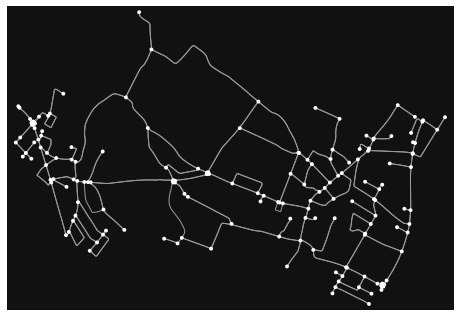

Now considering: Carmel, Indiana, USA


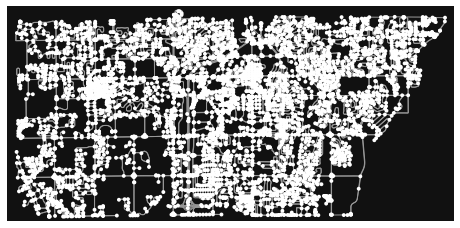

Now considering: Geneva, Switzerland


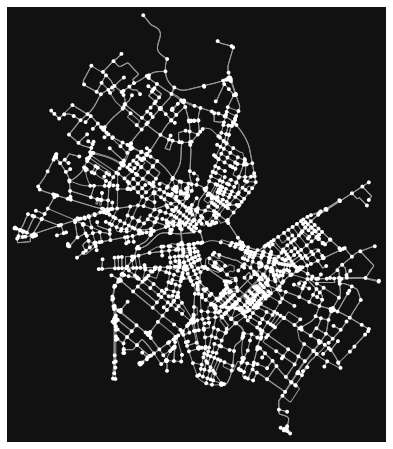

In [2]:
places = [
    "Piedmont, California, USA",
    "Fremont, California, USA",
    "Founex, Switzerland",
    "Carmel, Indiana, USA",
    "Geneva, Switzerland"
]

for place in places:
    G = ox.graph_from_place(place, network_type="drive")
    G = ox.speed.add_edge_speeds(G)
    G = ox.speed.add_edge_travel_times(G)
    print(f"Now considering: {place}")
    fig, ax = ox.plot_graph(G)
    plt.show()

    intersections = G.nodes
    path_lengths = dict(
        nx.all_pairs_dijkstra_path_length(G, weight='travel_time')
    )
    city_dict = {
        'intersections': intersections,
        'drive_times': path_lengths
    }

    with open(f"data/OSMNX_{place}_travel_times.pickle", "wb") as handle:
        pickle.dump(city_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)